<a href="https://colab.research.google.com/github/mngugi/ML_Cybersec/blob/main/Iterations_Methods_linear_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

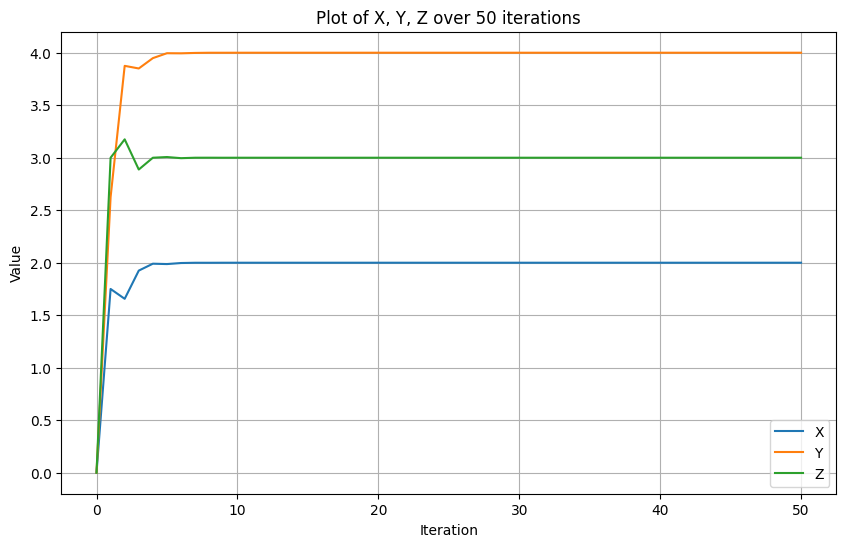

In [ ]:
import matplotlib.pyplot as plt

# Initial values
Xn, Yn, Zn = 0, 0, 0  # You can change these initial values if needed
iterations = 50  # Number of iterations

# Lists to store the values for plotting
X_values = [Xn]
Y_values = [Yn]
Z_values = [Zn]

# Iterate the equations
for _ in range(iterations):
    Xn_next = (7 + Yn - Zn) / 4
    Yn_next = (21 + 4*Xn + Zn) / 8
    Zn_next = (15 + 2*Xn - Yn) / 5

    # Update values
    Xn, Yn, Zn = Xn_next, Yn_next, Zn_next

    # Store values
    X_values.append(Xn)
    Y_values.append(Yn)
    Z_values.append(Zn)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(X_values, label='X')
plt.plot(Y_values, label='Y')
plt.plot(Z_values, label='Z')

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Plot of X, Y, Z over 50 iterations')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import numpy as np

# Constants
N = 100000
alpha = 0.5
beta = 0.3
gamma = 0.2
delta = 0.4
epsilon = 0.1
w1 = 0.4
w2 = 0.3
w3 = 0.3

# Initial values
P = np.ones(N)
M = np.ones(N)
D = np.ones(N)
S = np.ones(N)
C = 0.5

# Jacobi Iteration
def jacobi_iteration(P, D, S, M, C, alpha, beta, gamma, delta, epsilon):
    P_new = alpha * D + beta * S - gamma * M
    D_new = 0.9 * D
    S_new = delta * D + (1 - delta) * C
    M_new = M - epsilon * P
    return P_new, D_new, S_new, M_new

# Gauss-Seidel Iteration
def gauss_seidel_iteration(P, D, S, M, C, alpha, beta, gamma, delta, epsilon):
    D_new = 0.9 * D
    P_new = alpha * D_new + beta * S - gamma * M
    S_new = delta * D_new + (1 - delta) * C
    M_new = M - epsilon * P_new
    return P_new, D_new, S_new, M_new

# Calculate resilience
def calculate_resilience(P, S, M, w1, w2, w3):
    return np.mean(w1 * P + w2 * S - w3 * M)

# Jacobi method example
for _ in range(2):  # Run 2 iterations for demonstration
    P, D, S, M = jacobi_iteration(P, D, S, M, C, alpha, beta, gamma, delta, epsilon)
R_jacobi = calculate_resilience(P, S, M, w1, w2, w3)
print(f"Jacobi Method Resilience: {R_jacobi}")

# Reset initial values
P = np.ones(N)
M = np.ones(N)
D = np.ones(N)
S = np.ones(N)

# Gauss-Seidel method example
for _ in range(2):  # Run 2 iterations for demonstration
    P, D, S, M = gauss_seidel_iteration(P, D, S, M, C, alpha, beta, gamma, delta, epsilon)
R_gauss_seidel = calculate_resilience(P, S, M, w1, w2, w3)
print(f"Gauss-Seidel Method Resilience: {R_gauss_seidel}")


Jacobi Method Resilience: 0.13799999999999993
Gauss-Seidel Method Resilience: 0.08172000000000001


In [2]:
import numpy as np

# Constants
N = 100000
alpha = 0.5
beta = 0.3
gamma = 0.2
delta = 0.4
epsilon = 0.1
w1 = 0.4
w2 = 0.3
w3 = 0.3

# Initial values
P_initial = 1.0
M_initial = 1.0
D_initial = 1.0
S_initial = 1.0
C_initial = 0.5
A_initial = 0.5

# Initialize arrays
P_jacobi = np.full(N, P_initial)
M_jacobi = np.full(N, M_initial)
D_jacobi = np.full(N, D_initial)
S_jacobi = np.full(N, S_initial)

P_gs = np.full(N, P_initial)
M_gs = np.full(N, M_initial)
D_gs = np.full(N, D_initial)
S_gs = np.full(N, S_initial)

C = C_initial
A = A_initial

# Number of iterations
iterations = 10

# Function to compute resilience
def compute_resilience(P, S, M):
    return np.mean(w1 * P + w2 * S - w3 * M)

# Jacobi Iteration
for t in range(iterations):
    D_new = 0.9 * D_jacobi
    P_new = alpha * D_new + beta * S_jacobi - gamma * M_jacobi
    S_new = delta * D_new + (1 - delta) * C
    M_new = M_jacobi - epsilon * P_jacobi

    D_jacobi = D_new
    P_jacobi = P_new
    S_jacobi = S_new
    M_jacobi = M_new

    R_jacobi = compute_resilience(P_jacobi, S_jacobi, M_jacobi)
    print(f"Iteration {t+1} Jacobi Resilience: {R_jacobi}")

# Gauss-Seidel Iteration
for t in range(iterations):
    for i in range(N):
        D_gs[i] = 0.9 * D_gs[i]
        P_gs[i] = alpha * D_gs[i] + beta * S_gs[i] - gamma * M_gs[i]
        S_gs[i] = delta * D_gs[i] + (1 - delta) * C
        M_gs[i] = M_gs[i] - epsilon * P_gs[i]

    R_gs = compute_resilience(P_gs, S_gs, M_gs)
    print(f"Iteration {t+1} Gauss-Seidel Resilience: {R_gs}")


Iteration 1 Jacobi Resilience: 0.1480000000000001
Iteration 2 Jacobi Resilience: 0.10290000000000002
Iteration 3 Jacobi Resilience: 0.08975000000000002
Iteration 4 Jacobi Resilience: 0.07739900000000001
Iteration 5 Jacobi Resilience: 0.06631590000000011
Iteration 6 Jacobi Resilience: 0.05636359000000014
Iteration 7 Jacobi Resilience: 0.04742964700000009
Iteration 8 Jacobi Resilience: 0.039412683900000085
Iteration 9 Jacobi Resilience: 0.03222146543000015
Iteration 10 Jacobi Resilience: 0.02577388883900013
Iteration 1 Gauss-Seidel Resilience: 0.13450000000000006
Iteration 2 Gauss-Seidel Resilience: 0.08172000000000001
Iteration 3 Gauss-Seidel Resilience: 0.06592140000000012
Iteration 4 Gauss-Seidel Resilience: 0.051640128000000056
Iteration 5 Gauss-Seidel Resilience: 0.03872320056000005
Iteration 6 Gauss-Seidel Resilience: 0.02703290757120008
Iteration 7 Gauss-Seidel Resilience: 0.01644528442262408
Iteration 8 Gauss-Seidel Resilience: 0.006848736941076544
Iteration 9 Gauss-Seidel Resili